# XGBoost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('../../dataset/heart-failure-tratado.csv')
df.head(3)

,ExerciseAngina,Oldpeak,ST_Slope,MaxHR,ChestPainType,HeartDisease
0,0,0.0,2,172,1,0
1,0,1.0,1,156,2,1
2,0,0.0,2,98,1,0


In [3]:
# Features
x = df.drop(columns=['HeartDisease'])

# Target
y = df['HeartDisease']

In [4]:
# Split do dataset em conjuntos de treinamento e teste.

# # 70% treino, 30% teste
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

# 90% treino, 10% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=45)


In [5]:
modelo = XGBClassifier()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

# Se y_pred veio de 'binary:logistic' ou valores contínuos
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.8260869565217391
Precision: 0.7954545454545454
Recall: 0.8333333333333334
F1-score: 0.813953488372093


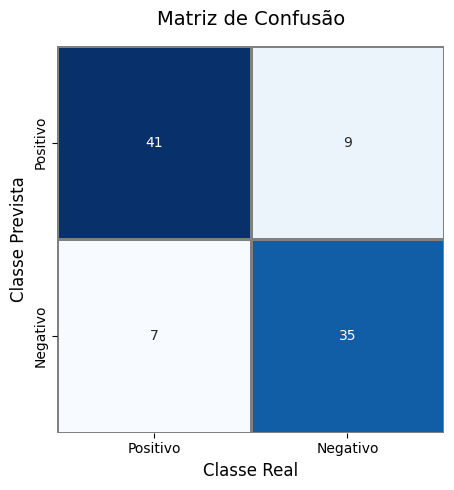

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positivo', 'Negativo'],
            yticklabels=['Positivo', 'Negativo'],
            linewidths=1, linecolor='gray', square=True)

plt.title("Matriz de Confusão", fontsize=14, pad=15)
plt.xlabel("Classe Real", fontsize=12)
plt.ylabel("Classe Prevista", fontsize=12)
plt.tight_layout()
plt.show()

# Tuning dos hiperparâmetros

In [8]:
# Modelo base
xgb = XGBClassifier()

# # Grade de parâmetros
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],      # porcentagem de colunas usadas por árvore
    'gamma': [0, 0.1, 0.3, 0.5],              # penaliza divisões desnecessárias (evita overfitting)
    'reg_alpha': [0, 0.1, 0.5, 1],            # regularização L1 (Lasso)
    'reg_lambda': [1, 1.5, 2, 3],             # regularização L2 (Ridge)
    'scale_pos_weight': [1, 2, 5]             # útil se há desbalanceamento de classes
}

# Busca com validação cruzada
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=10, scoring='accuracy'
                           )

grid_search.fit(x_train, y_train)

# Melhor combinação
print("Melhores parâmetros:", grid_search.best_params_)

# Se y_pred veio de 'binary:logistic' ou valores contínuos
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

KeyboardInterrupt: 